<a href="https://colab.research.google.com/github/mazon1/ML-Test/blob/mazon1-Amii-files/1_Amii_Project__FINAL_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries & Read in Data

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
import seaborn as sns

# import google drive
from google.colab import drive
drive.mount('/content/drive/')

# Change directory to google drive- Just upload the file right into the drive you want(Uchennamachine) for easy access
%cd /content/drive/My Drive/

df = pd.read_csv("nasa_processed.csv")

#define titanic - you'd need this going forward
nasa = pd.read_csv('nasa_processed.csv')
nasa.head()

Mounted at /content/drive/
/content/drive/My Drive


,Ps30r_std,Ps30r_mean,Ps30r_median,NRfr_std,NRfr_mean,NRfr_median,BPRr_std,BPRr_mean,BPRr_median,T50r_std,T50r_mean,T50r_median,time_in_cyclesr_std,time_in_cyclesr_mean,time_in_cyclesr_median,NRcr_std,NRcr_mean,NRcr_median,phir_std,phir_mean,phir_median,P30r_std,P30r_mean,P30r_median,Ncr_std,Ncr_mean,Ncr_median,Nfr_std,Nfr_mean,Nfr_median,o_condition,label_target
0,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.0000,0.000000,0.000000,0.00,0.0,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,1,0
1,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.0000,0.000000,0.000000,0.00,0.0,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,1,0
2,0.121655,47.410000,47.47,0.026458,2388.04,2388.03,0.007640,8.423033,8.4195,1.850009,1402.646667,1403.14,1.0,2.0,2.0,3.717450,8134.446667,8133.23,0.404475,522.12,522.28,0.327159,554.123333,554.26,4.632023,9047.733333,9046.19,0.020000,2388.060000,2388.06,1,0
3,0.181475,47.296667,47.27,0.026458,2388.06,2388.07,0.033419,8.405933,8.4178,1.166576,1403.070000,1403.14,1.0,3.0,3.0,1.215401,8132.850000,8133.23,0.302655,522.52,522.42,0.361985,554.153333,554.26,4.470582,9048.830000,9049.48,0.035119,2388.076667,2388.08,1,0
4,0.083865,47.226667,47.27,0.026458,2388.05,2388.04,0.032507,8.405133,8.4178,2.176840,1404.096667,1404.20,1.0,4.0,4.0,0.338083,8133.620000,8133.80,0.340441,522.49,522.42,0.225906,554.236667,554.26,2.857872,9052.523333,9052.94,0.025166,2388.083333,2388.08,1,0


### Split into train and test set
Note: Final Test set not included so technically , test set referred to here is the validation set



In [ ]:
X = nasa.drop(['label_target'], axis=1)
y = nasa['label_target']

#splitting the data set (note we already have an actual test set, so this test set here is the validation set)
X_train, X_val, y_train, y_val = train_test_split( X, y, test_size=0.33, random_state=42,stratify=y)

In [ ]:
#confirming that the split was done (67% to 33%)
for dataset in [y_train, y_val]:
    print(round(len(dataset) / len(y), 2))

0.67
0.33


In [ ]:
#Display X_train
X_train.head()

,Ps30r_std,Ps30r_mean,Ps30r_median,NRfr_std,NRfr_mean,NRfr_median,BPRr_std,BPRr_mean,BPRr_median,T50r_std,T50r_mean,T50r_median,time_in_cyclesr_std,time_in_cyclesr_mean,time_in_cyclesr_median,NRcr_std,NRcr_mean,NRcr_median,phir_std,phir_mean,phir_median,P30r_std,P30r_mean,P30r_median,Ncr_std,Ncr_mean,Ncr_median,Nfr_std,Nfr_mean,Nfr_median,o_condition
249643,0.104712,48.128623,48.145969,0.033398,2388.268430,2388.269320,0.019976,8.516182,8.525810,2.909960,1428.508849,1428.638398,1.0,142.732994,142.732994,0.810241,8123.694586,8124.004031,0.285043,519.657902,519.686173,0.459135,551.092460,551.065340,1.691167,9047.173032,9046.585919,0.028559,2388.274223,2388.282670,1
186719,1.243657,47.180302,47.753658,0.112783,2388.192422,2388.140000,0.144568,8.593757,8.528552,59.102593,1391.215469,1421.473288,1.0,278.367503,278.367503,4.413442,8197.317210,8197.885215,86.451840,470.713994,520.483743,91.628899,499.410985,552.095521,162.584706,9036.826307,9128.568890,39.851351,2365.153635,2388.145453,1
198699,0.147269,47.997324,48.027345,0.045611,2388.419274,2388.425374,0.023448,8.258095,8.264153,1.607911,1421.846751,1421.408362,1.0,209.292529,209.292529,3.150623,8182.826304,8181.995230,0.534812,533.571695,533.618299,0.453463,566.010375,566.149856,3.369767,9114.140886,9113.359235,0.049193,2388.409433,2388.395851,1
45062,3.102322,40.160000,41.840000,207.724854,2268.170000,2388.080000,0.860206,9.848833,9.356700,48.488737,1095.273333,1120.870000,1.0,74.000000,74.000000,122.880479,8020.333333,8090.070000,19.702474,142.100000,130.850000,21.468775,151.280000,138.900000,183.118160,8222.393333,8324.850000,171.285395,2113.153333,2212.010000,6
98942,0.123423,48.033333,48.000000,0.041633,2388.206667,2388.220000,0.013990,8.495800,8.488900,5.953495,1423.210000,1421.610000,1.0,129.000000,129.000000,3.966598,8139.370000,8138.670000,0.375810,520.313333,520.210000,0.260000,551.960000,552.100000,3.464236,9067.443333,9068.370000,0.043589,2388.210000,2388.230000,1


### Write out all data

In [ ]:
X_train.to_csv('nasatrain_features.csv', index=False)
X_val.to_csv('nasaval_features.csv', index=False)


y_train.to_csv('nasatrain_labels.csv', index=False)
y_val.to_csv('nasaval_labels.csv', index=False)


In [ ]:
#Read in Training Data
tr_features = pd.read_csv('nasatrain_features.csv')
tr_labels = pd.read_csv('nasatrain_labels.csv')

In [ ]:
#Define Results to print
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

# kNN 

In [ ]:
#importing Libraries
from sklearn.neighbors import KNeighborsClassifier
import joblib
import pandas as pd
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [ ]:
# To show list of hyperparameters that we can tune
KNeighborsClassifier()


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# Base Model Evaluation

In [ ]:
knn_base= KNeighborsClassifier()
knn_base.fit(tr_features,tr_labels.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#Predicting the labels using the base modeel
tr_labelspredict = knn_base.predict(tr_features)

In [ ]:
# To view accuracy score, recall score, precision score and f1 score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

 #Train Scores

acc_train = accuracy_score(y_train,tr_labelspredict)
p_score_train = precision_score(y_train,tr_labelspredict)
r_score_train = recall_score(y_train,tr_labelspredict)
f1_score_train = f1_score(y_train,tr_labelspredict)

 #Test Scores

val_labelspredict = knn_base.predict(X_val)
acc_test = accuracy_score(y_val,val_labelspredict)
p_score_test = precision_score(y_val,val_labelspredict)
r_score_test = recall_score(y_val,val_labelspredict)
f1_score_test = f1_score(y_val,val_labelspredict)

print(f'The Accuracy score for the training set is:{acc_train}')
print(f'The Precision score for the training set is:{p_score_train}')
print(f'The Recall score for the training set is:{r_score_train}')
print(f'The F1 score for the training set is:{f1_score_train}')
print('--------------------------------------------------------------')
print(f'The Accuracy score for the validation set is:{acc_test}')
print(f'The Precision score for the validation set is:{p_score_test}')
print(f'The Recall score for the validation set is:{r_score_test}')
print(f'The F1 score for the validation set is:{f1_score_test}')
# train_results = [acc_train,p_score_train,r_score_train,f1_score_train]
# test_results = [acc_test,p_score_test,r_score_test,f1_score_test]

The Accuracy score for the training set is:0.9765799588808438
The Precision score for the training set is:0.956383814376926
The Recall score for the training set is:0.9987064885897571
The F1 score for the training set is:0.9770870629874272
--------------------------------------------------------------
The Accuracy score for the validation set is:0.967268418187059
The Precision score for the validation set is:0.941620421753607
The Recall score for the validation set is:0.9963061812746877
The F1 score for the validation set is:0.9681917211328975


# Hyperparameters Tuning

In [ ]:
#Fitting the Model and Evaluating
knn = KNeighborsClassifier()
parameters = {
    'n_neighbors': [1,3, 5,11,15,20],
    # to test 1,3,5,10,15,20 leaves,
    'weights':['uniform','distance']
    
}
#using GridSearchCV to loop through predefined hyperparameters and fit your estimator (model) on your training set
cv = GridSearchCV(knn,parameters, cv = 5)
#cv = 5 meaning it will run 5-fold validation for each hyperparameter combination
cv.fit(tr_features,tr_labels.values.ravel())
# we use ravel for the labels to convert it to an array, since the label is usually just one column and the algorithm expects an array
print_results(cv)

BEST PARAMS: {'n_neighbors': 1, 'weights': 'uniform'}

0.979 (+/-0.001) for {'n_neighbors': 1, 'weights': 'uniform'}
0.979 (+/-0.001) for {'n_neighbors': 1, 'weights': 'distance'}
0.97 (+/-0.001) for {'n_neighbors': 3, 'weights': 'uniform'}
0.971 (+/-0.001) for {'n_neighbors': 3, 'weights': 'distance'}
0.963 (+/-0.002) for {'n_neighbors': 5, 'weights': 'uniform'}
0.966 (+/-0.002) for {'n_neighbors': 5, 'weights': 'distance'}
0.953 (+/-0.002) for {'n_neighbors': 11, 'weights': 'uniform'}
0.958 (+/-0.002) for {'n_neighbors': 11, 'weights': 'distance'}
0.948 (+/-0.003) for {'n_neighbors': 15, 'weights': 'uniform'}
0.955 (+/-0.002) for {'n_neighbors': 15, 'weights': 'distance'}
0.945 (+/-0.003) for {'n_neighbors': 20, 'weights': 'uniform'}
0.951 (+/-0.003) for {'n_neighbors': 20, 'weights': 'distance'}


In [ ]:
cv.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### Write out pickled model
We pickle the model by saving it and writing it to a file that can be used to compare with other hyperparameters performance

In [ ]:
joblib.dump(cv.best_estimator_, 'NASAkNN_model.pkl')

['NASAkNN_model.pkl']

In [ ]:
knn = cv.best_estimator_
#Predicting the labels using the optimized hyperparameters
tr_labelspredict = knn.predict(tr_features)


In [ ]:
# To view accuracy score, recall score, precision score and f1 score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

 #Train Scores

acc_train = accuracy_score(y_train,tr_labelspredict)
p_score_train = precision_score(y_train,tr_labelspredict)
r_score_train = recall_score(y_train,tr_labelspredict)
f1_score_train = f1_score(y_train,tr_labelspredict)

 #Test Scores

val_labelspredict = cv.predict(X_val)
acc_test = accuracy_score(y_val,val_labelspredict)
p_score_test = precision_score(y_val,val_labelspredict)
r_score_test = recall_score(y_val,val_labelspredict)
f1_score_test = f1_score(y_val,val_labelspredict)

print(f'The Accuracy score for the training set is:{acc_train}')
print(f'The Precision score for the training set is:{p_score_train}')
print(f'The Recall score for the training set is:{r_score_train}')
print(f'The F1 score for the training set is:{f1_score_train}')
print('--------------------------------------------------------------')
print(f'The Accuracy score for the validation set is:{acc_test}')
print(f'The Precision score for the validation set is:{p_score_test}')
print(f'The Recall score for the validation set is:{r_score_test}')
print(f'The F1 score for the validation set is:{f1_score_test}')
# train_results = [acc_train,p_score_train,r_score_train,f1_score_train]
# test_results = [acc_test,p_score_test,r_score_test,f1_score_test]


The Accuracy score for the training set is:1.0
The Precision score for the training set is:1.0
The Recall score for the training set is:1.0
The F1 score for the training set is:1.0
--------------------------------------------------------------
The Accuracy score for the validation set is:0.9820969136659158
The Precision score for the validation set is:0.9673773545849721
The Recall score for the validation set is:0.997843493114124
The F1 score for the validation set is:0.9823742708497556


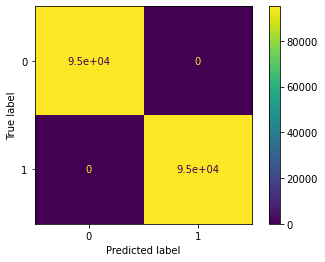

In [ ]:
# Plot confusion matrix of training data(Matrix board from left to right: TN,FN,FP,TP)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
cm = confusion_matrix(y_train,tr_labelspredict)
plot_confusion_matrix(knn, X_train, y_train)

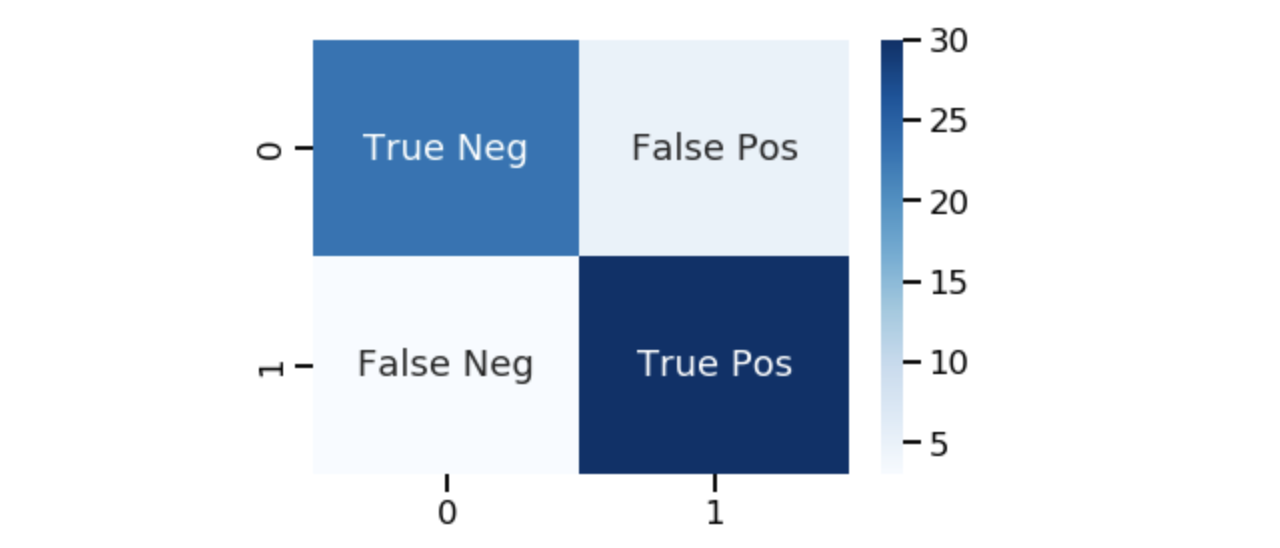